Number of GPU = 1
Found 87000 images belonging to 1 classes.
Found 28 images belonging to 1 classes.
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 6, 6, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               4718848   
_________________________________________________________________
dense_11 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 257       
Total params: 19,499,585
Trainable params: 4,784,897
Non-trainable params: 14,714,688
_________________________________________________________________

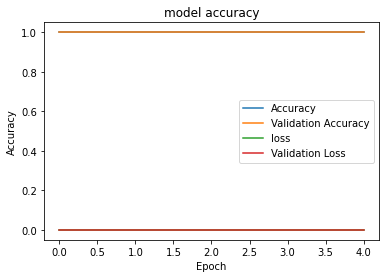

/usr/local/lib/python3.7/dist-packages/keras/engine/saving.py:384: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


[[1.]]


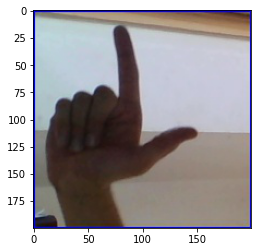

In [4]:
import keras,os
import tensorflow as tf
from keras.preprocessing import image
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.utils import to_categorical
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
import numpy as np
gpu_device = tf.config.experimental.list_physical_devices('GPU')
print(f"Number of GPU = {len(gpu_device)}")
tf.config.experimental.set_memory_growth(gpu_device[0], True)

trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory='/content/ASL/asl_alphabet_train',target_size=(200,200))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory='/content/ASL/asl_alphabet_test', target_size=(200,200))

VGG = keras.applications.VGG16(input_shape=(200, 200, 3),include_top=False,weights='imagenet')
VGG.trainable = False
model = keras.Sequential([
  VGG,
  keras.layers.Flatten(),
  keras.layers.Dense(units=256,activation="relu"),
  keras.layers.Dense(units=256,activation="relu"),
  keras.layers.Dense(units=1, activation="softmax")
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

model.summary()

hist = model.fit_generator(steps_per_epoch=100,generator=traindata, validation_data= testdata, validation_steps=100,epochs=5)
model.save('vggclf.h5')
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()



img = image.load_img("/content/ASL/asl_alphabet_test/asl_alphabet_test/L_test.jpg",target_size=(200,200))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
saved_model = load_model("vggclf.h5")
output = saved_model.predict(img)
print(output)